1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
print('Original matrix:')
print(m)
print('Total mean: ', np.mean(m))
print('Mean of the columns: ', np.mean(m, axis=0))
print('Mean of the rows: ', np.mean(m, axis=1))

Original matrix:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Total mean:  5.5
Mean of the columns:  [4. 5. 6. 7.]
Mean of the rows:  [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [24]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

#Using numpy

out1 = np.outer(u,v)
print(out1)

#Using list comprehension

out2 = np.reshape([i*j for i in u for j in v], (4,4))
print(out2)

#Using broadcasting

out3 = np.dot(np.reshape(u,(4,1)),np.reshape(v,(1,4)))
print(out3)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [30]:
m = np.random.rand(10,6)*3
print(m)
mask = (m<0.3)
m[mask] = 0
print(m)

[[2.8720125  0.27592432 0.18483787 0.20566613 1.49716377 2.60435708]
 [2.71216497 0.72126576 1.00361287 2.45541988 2.48939554 0.70101506]
 [1.11689019 0.38011353 2.63891807 0.80008948 1.22274344 1.9547492 ]
 [1.65512798 1.58582733 1.3895604  2.88181764 0.4732931  1.80333383]
 [2.33634014 2.17420551 1.985929   0.35997439 0.89608632 1.90239855]
 [0.0223929  0.70609177 2.55694834 0.48887037 2.29614945 2.64599205]
 [0.12580058 0.54378876 0.26309362 0.17180177 0.79865709 1.27566896]
 [2.11212549 1.50523934 2.53006297 0.46294703 1.53058984 2.54230463]
 [0.46292688 2.32393737 0.54486758 0.6944166  2.5892481  1.85746099]
 [2.10905543 2.4006778  0.89244733 0.93942484 2.32900105 0.619522  ]]
[[2.8720125  0.         0.         0.         1.49716377 2.60435708]
 [2.71216497 0.72126576 1.00361287 2.45541988 2.48939554 0.70101506]
 [1.11689019 0.38011353 2.63891807 0.80008948 1.22274344 1.9547492 ]
 [1.65512798 1.58582733 1.3895604  2.88181764 0.4732931  1.80333383]
 [2.33634014 2.17420551 1.985929 

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

<class 'numpy.ndarray'>


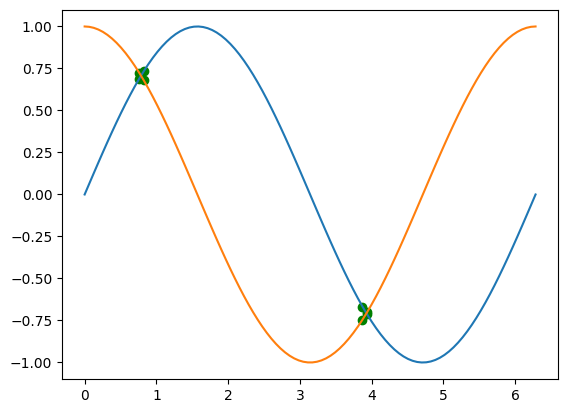

In [85]:
import math as mt
import matplotlib.pyplot as plt

v = np.linspace(0,2*mt.pi,100)
# print(v)
v1 = v[9::10]
# print(v)
v1 = v1[::-1]
# print(v1)
mask = (np.absolute(np.cos(v)-np.sin(v))<0.1)
v1 = v[mask]


plt.plot(v, np.sin(v))
plt.plot(v, np.cos(v))
plt.scatter(v1,np.cos(v1), color = 'green')
plt.scatter(v1,np.sin(v1), color = 'green')
plt.show()


5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [24]:
v = np.arange(10) +1
table = np.dot(np.reshape(v,(len(v),1)),np.reshape(v,(1,len(v))))
print(table)
print(np.fliplr(table).diagonal())
a = table[1:,:np.size(table,1)]
print(a.diagonal())


[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[10 18 24 28 30 30 28 24 18 10]
[[  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [30]:
d = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

grid = -(np.reshape(d,(len(d),1))-np.reshape(d,(1,len(d))))
print(grid)

print(np.around(grid*1.60934))

[[    0   198   303   736   871  1175  1475  1544  1913  2448]
 [ -198     0   105   538   673   977  1277  1346  1715  2250]
 [ -303  -105     0   433   568   872  1172  1241  1610  2145]
 [ -736  -538  -433     0   135   439   739   808  1177  1712]
 [ -871  -673  -568  -135     0   304   604   673  1042  1577]
 [-1175  -977  -872  -439  -304     0   300   369   738  1273]
 [-1475 -1277 -1172  -739  -604  -300     0    69   438   973]
 [-1544 -1346 -1241  -808  -673  -369   -69     0   369   904]
 [-1913 -1715 -1610 -1177 -1042  -738  -438  -369     0   535]
 [-2448 -2250 -2145 -1712 -1577 -1273  -973  -904  -535     0]]
[[    0.   319.   488.  1184.  1402.  1891.  2374.  2485.  3079.  3940.]
 [ -319.     0.   169.   866.  1083.  1572.  2055.  2166.  2760.  3621.]
 [ -488.  -169.     0.   697.   914.  1403.  1886.  1997.  2591.  3452.]
 [-1184.  -866.  -697.     0.   217.   707.  1189.  1300.  1894.  2755.]
 [-1402. -1083.  -914.  -217.     0.   489.   972.  1083.  1677.  2538.]
 [-1

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


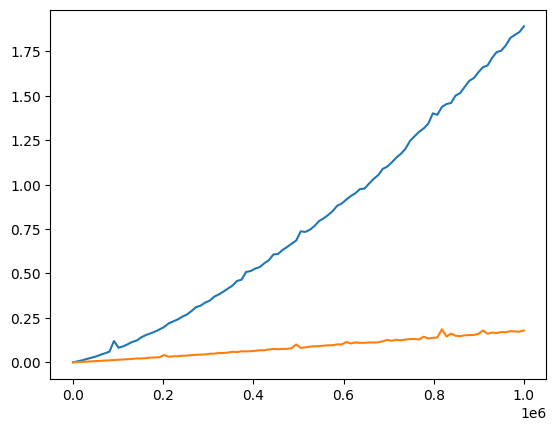

In [13]:
import math as mt
import numpy as np
import timeit
import matplotlib.pyplot as plt

def isPrime(n):
    for i in range(2,mt.floor(mt.sqrt(n))+1):
        if n%i==0:
            return False
    return True

N = 99
numbers = np.arange(2,N+1)
mask = np.array(list(map(isPrime, numbers)))

print(numbers[mask])


x = np.linspace(10, 1000000,100)
y = np.zeros(len(x))

for i,val in enumerate(x):
    start = timeit.default_timer()
    mask1 = np.array(list(map(isPrime,range(2,int(val)))))
    stop = timeit.default_timer()
    y[i] = stop-start

plt.plot(x,y)


def erathothenesMask(N):
    m = np.ones(N+1, dtype= bool)
    m[0] = False
    m[1] = False
    for i in range(2,mt.floor(mt.sqrt(N))+1):
        if m[i] == True:
            a = mt.floor(N/i)
            for j in [i*(k+2) for k in range(a-1)]:
                m[j] = False
    return m


numbers1 = np.arange(0,N+1)
print(numbers1[erathothenesMask(N)])

for i,val in enumerate(x):
    start = timeit.default_timer()
    mask1 = erathothenesMask(int(val))
    stop = timeit.default_timer()
    y[i] = stop-start

plt.plot(x,y)




8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

20
20.0
-10
10.0
0
0.0
-56
56.0
-4
4.0
24
24.0
-18
18.0
6
6.0
10
10.0
32
32.0
-8
8.0
10
10.0
-4
4.0
48
48.0
12
12.0
-70
70.0
14
14.0
-72
72.0
10
10.0
82
82.0
-16
16.0
4
4.0
70
70.0
16
16.0
-26
26.0
-42
42.0
-12
12.0
-18
18.0
-8
8.0
126
126.0
-24
24.0
-40
40.0
-112
112.0
-14
14.0
32
32.0
48
48.0
-38
38.0
36
36.0
84
84.0
-116
116.0
-14
14.0
-44
44.0
64
64.0
172
172.0
58
58.0
76
76.0
-78
78.0
-132
132.0
28
28.0
-14
14.0
48
48.0
-50
50.0
-98
98.0
96
96.0
-172
172.0
40
40.0
44
44.0
36
36.0
-36
36.0
42
42.0
-104
104.0
40
40.0
8
8.0
106
106.0
-240
240.0
284
284.0
-124
124.0
-54
54.0
-148
148.0
24
24.0
-20
20.0
-142
142.0
-134
134.0
8
8.0
-178
178.0
-100
100.0
58
58.0
-88
88.0
-80
80.0
34
34.0
12
12.0
-12
12.0
10
10.0
302
302.0
54
54.0
-44
44.0
-26
26.0
-260
260.0
164
164.0
-192
192.0
-30
30.0
-32
32.0
160
160.0
-48
48.0
-34
34.0
-34
34.0
-74
74.0
-84
84.0
-12
12.0
28
28.0


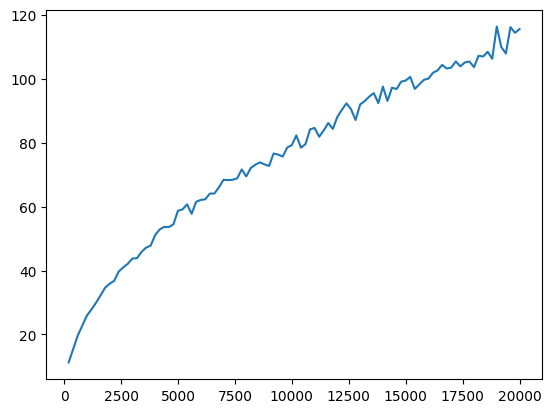

In [86]:


random_walks = 2*np.random.randint(0,2,size=(1000,200))-1


final_distance = np.sum(random_walks,axis=1)
# print(np.mean(final_distance))
squared_distance = (final_distance)**2

mean_steps = np.mean(random_walks,axis=0)

steps = np.linspace(200,20000,100)
mean_dist = np.zeros(len(steps))

for i,val  in enumerate(steps):
    walk = 2*np.random.randint(0,2,size=(1000,int(val)))-1

    mean_dist[i] = np.mean(np.sqrt(np.power(np.sum(walk,axis=1),2)))

plt.plot(steps,mean_dist)

